## Shadow Prices and Sensitivity Analysis


Recall that the linear program for the bag production problem is given by 

\begin{align}
\underset{x_S, x_D}{\text{max}} \;\; & 10 x_s + 8 x_D\\
\text{s.t.} \;\; &\frac{7}{10} x_S + x_D \le 630 \\
& \frac{1}{2} x_S + \frac{5}{6} x_D \le 600 \\
& x_S + \frac{2}{3} x_D \le 708 \\
& \frac{1}{10}x_S + \frac{1}{4} x_D \le 135  \\
& x_S, x_D \ge 0.
\end{align}


The code below implements and solves the LP.

In [1]:
from gurobipy import *


#Initialize model. 
mod = Model()

# Define decision variables. We will use variable names 'S' and 'D' for simplicity.
S = mod.addVar()
D = mod.addVar()

# Construct constraints.
cutting_con = mod.addConstr((7/10)*S + D  <= 630)
sewing_con =  mod.addConstr((1/2)*S + (5/6)*D  <= 600)
finishing_con =  mod.addConstr(S + (2/3)*D  <= 708)
inspecting_con = mod.addConstr((1/10)*S + (1/4)*D  <= 135)

# Add non-negativity constraints.
mod.addConstr(S >= 0.0)
mod.addConstr(D >= 0.0)

# Create the objective function, and set it to be maximized.
mod.setObjective(10*S + 9*D, GRB.MAXIMIZE)

mod.update()
mod.optimize()

Academic license - for non-commercial use only
Optimize a model with 6 rows, 2 columns and 10 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [9e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 7e+02]
Presolve removed 2 rows and 0 columns
Presolve time: 0.01s
Presolved: 4 rows, 2 columns, 8 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.0000000e+03   4.791138e+01   0.000000e+00      0s
       2    7.6680000e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds
Optimal objective  7.668000000e+03


What if the right hand side of the cutting constraint increased from 630 to 631? How would this change profit?

In [2]:
#Initialize model. 
mod = Model()

# Define decision variables. We will use variable names 'S' and 'D' for simplicity.
S = mod.addVar()
D = mod.addVar()

# Construct constraints.
cutting_con = mod.addConstr((7/10)*S + D  <= 631)
sewing_con =  mod.addConstr((1/2)*S + (5/6)*D  <= 600)
finishing_con =  mod.addConstr(S + (2/3)*D  <= 708)
inspecting_con = mod.addConstr((1/10)*S + (1/4)*D  <= 135)

# Add non-negativity constraints.
mod.addConstr(S >= 0.0)
mod.addConstr(D >= 0.0)

# Create the objective function, and set it to be maximized.
mod.setObjective(10*S + 9*D, GRB.MAXIMIZE)

mod.update()
mod.optimize()

Optimize a model with 6 rows, 2 columns and 10 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [9e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 7e+02]
Presolve removed 2 rows and 0 columns
Presolve time: 0.01s
Presolved: 4 rows, 2 columns, 8 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.0142857e+03   4.826852e+01   0.000000e+00      0s
       2    7.6723750e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds
Optimal objective  7.672375000e+03


Profit increased from $\$$7668 to $\$$7672.375 -- an increased of $\$$4.375. There is another way to get this information, called the "shadow price" of the cutting constraint.

In [3]:
# Get shadow price of cutting constraint
cutting_con.pi

4.375000000000001

The shadow price of a constraint is the increase in the optimal value under a single unit increase in the right hand side of the constraint. The shadow price is only valid "locally", i.e., for small changes in the right hand side of the constraint. 

If we want to do a broader analysis of the effect that increases in the cutting capacity has on the optimal value, we can do so manually.

In [4]:
cutValue = [630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730]

optValue = [None]*len(cutValue)
for i in range(len(cutValue)):
    #Initialize model. 
    mod = Model()

    # Define decision variables. We will use variable names 'S' and 'D' for simplicity.
    S = mod.addVar()
    D = mod.addVar()

    # Construct constraints.
    cutting_con = mod.addConstr((7/10)*S + D  <= cutValue[i])
    sewing_con =  mod.addConstr((1/2)*S + (5/6)*D  <= 600)
    finishing_con =  mod.addConstr(S + (2/3)*D  <= 708)
    inspecting_con = mod.addConstr((1/10)*S + (1/4)*D  <= 135)

    # Add non-negativity constraints.
    mod.addConstr(S >= 0.0)
    mod.addConstr(D >= 0.0)

    # Create the objective function, and set it to be maximized.
    mod.setObjective(10*S + 9*D, GRB.MAXIMIZE)

    mod.update()
    mod.optimize()
    
    optValue[i] = mod.objval;
    

    

Optimize a model with 6 rows, 2 columns and 10 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [9e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 7e+02]
Presolve removed 2 rows and 0 columns
Presolve time: 0.01s
Presolved: 4 rows, 2 columns, 8 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.0000000e+03   4.791138e+01   0.000000e+00      0s
       2    7.6680000e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds
Optimal objective  7.668000000e+03
Optimize a model with 6 rows, 2 columns and 10 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [9e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 7e+02]
Presolve removed 2 rows and 0 columns
Presolve time: 0.01s
Presolved: 4 rows, 2 columns, 8 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.1428571e+03   5.1482

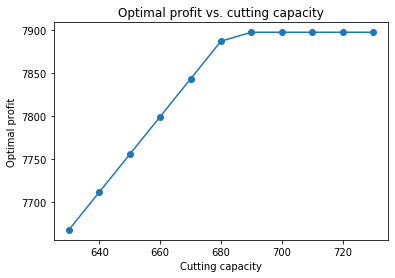

In [6]:
## Plot change in optimal value with 

import matplotlib.pyplot as plt
plt.scatter(cutValue, optValue)
plt.plot(cutValue, optValue)
plt.title('Optimal profit vs. cutting capacity')
plt.xlabel('Cutting capacity')
plt.ylabel('Optimal profit')
plt.show()